Рабочая тетрадь №4 Мурдасов И.А./ ИМБО-01-24

Представьте собственные данные и постройте эктраполяцию полиномами первой, второй и третьей степени.

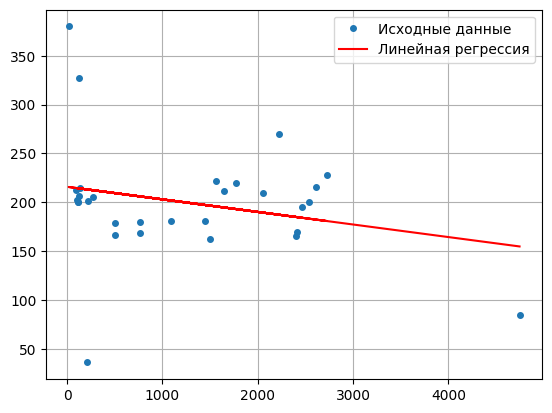

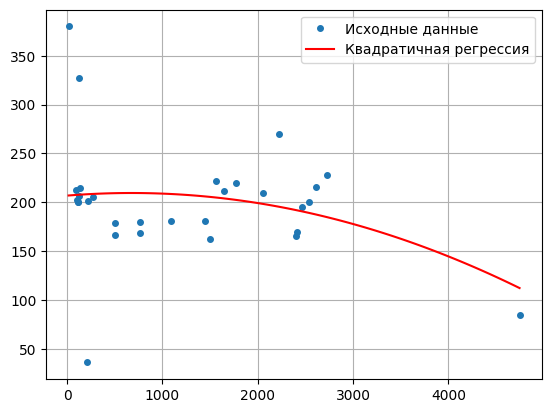

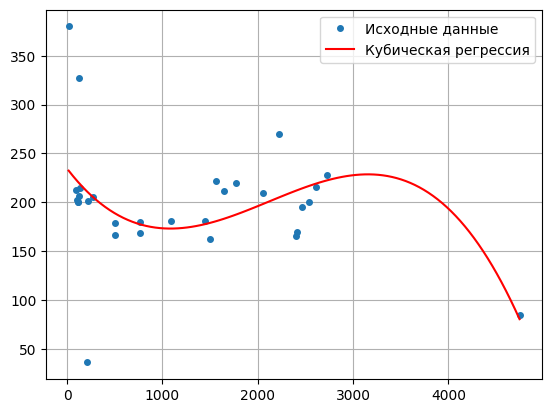

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных, выборка x и y
url = "https://raw.githubusercontent.com/akmand/datasets/refs/heads/main/airlines.csv"
df = pd.read_csv(url)
x = df.iloc[:30, 1]
y = df.iloc[:30, -2]

# эстраполяционный полином первого порядка 
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
plt.plot(x, y, 'o', label='Исходные данные', markersize=4)
plt.plot(x, m*x + c, 'r', label='Линейная регрессия')
plt.legend()
plt.grid()
plt.show()

# эстраполяционный полином второго порядка 
m = np.vstack([x**2, x, np.ones(len(x))]).T
s = np.linalg.lstsq(m, y, rcond=None)[0]
x_prec = np.linspace(min(x), max(x), 100)
plt.plot(x, y, 'o', label='Исходные данные', markersize=4)
plt.plot(x_prec, s[0]*x_prec**2 + s[1]*x_prec + s[2], 'r', label='Квадратичная регрессия')
plt.legend()
plt.grid()
plt.show()

# эстраполяционный полином третьего порядка 
m = np.vstack([x**3, x**2, x, np.ones(len(x))]).T
s = np.linalg.lstsq(m, y, rcond=None)[0]
x_prec = np.linspace(min(x), max(x), 100)
plt.plot(x, y, 'o', label='Исходные данные', markersize=4)
plt.plot(x_prec, s[0]*x_prec**3 + s[1]*x_prec**2 + s[2]*x_prec + s[3], 'r', label='Кубическая регрессия')
plt.legend()
plt.grid()
plt.show()

Подставьте собственные данные и поэкспериментируйте с представленными функциями. Проанализируйте динамику изменения данных.  
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv)

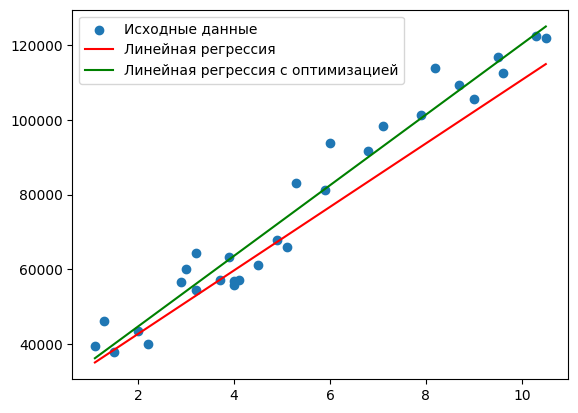

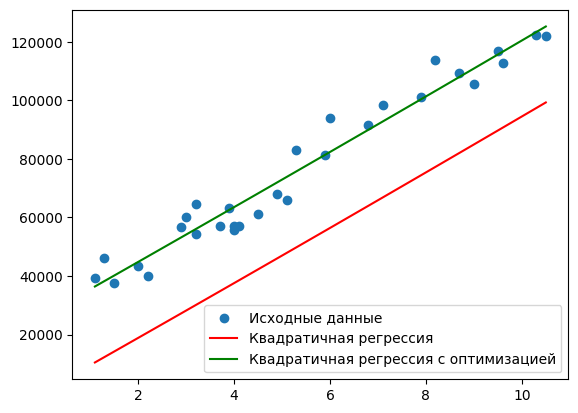

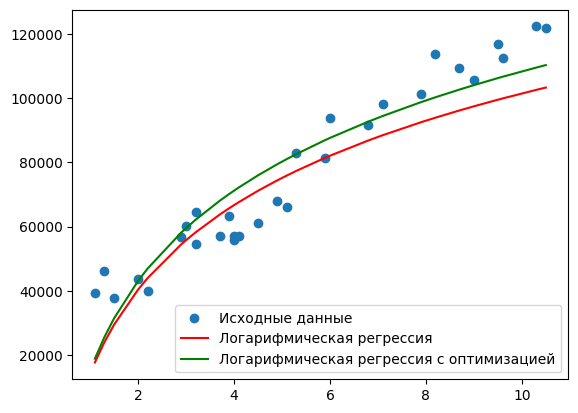

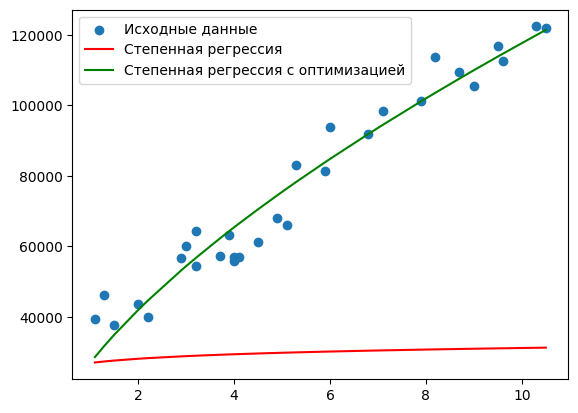

[2.68510611e+04 6.41676815e-01]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

# Загрузка данных, выборка x и y
url = "https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv"
df = pd.read_csv(url)
x = df.iloc[:, 0]
y = df.iloc[:, -1]


# 1 функция
beta = (25700, 8500)
def f_1(x, b0, b1):
    return b0 + b1 * x
y_func = f_1(x, *beta)

beta_opt, beta_cov = curve_fit(f_1, x, y)

fig, ax = plt.subplots()
ax.scatter(x, y, label='Исходные данные')
ax.plot(x, y_func, color='red', label='Линейная регрессия')
ax.plot(x, f_1(x, *beta_opt), color='green', label='Линейная регрессия с оптимизацией')
ax.legend()
plt.show()
#print(beta_opt)


# 2 функция
beta = (2.62149328e+02, 9.25928380e+03, 1.63925787e+01)
def f_2(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x**2
y_func = f_2(x, *beta)

beta_opt, beta_cov = curve_fit(f_2, x, y)

fig, ax = plt.subplots()
ax.scatter(x, y, label='Исходные данные')
ax.plot(x, y_func, color='red', label='Квадратичная регрессия')
ax.plot(x, f_2(x, *beta_opt), color='green', label='Квадратичная регрессия с оптимизацией')
ax.legend()
plt.show()
#print(beta_opt)


# 3 функция
beta = (14000, 38000)
def f_3(x, b0, b1):
    return b0 + b1 * np.log(x)
y_func = f_3(x, *beta)

beta_opt, beta_cov = curve_fit(f_3, x, y)

fig, ax = plt.subplots()
ax.scatter(x, y, label='Исходные данные')
ax.plot(x, y_func, color='red', label='Логарифмическая регрессия')
ax.plot(x, f_3(x, *beta_opt), color='green', label='Логарифмическая регрессия с оптимизацией')
ax.legend()
plt.show()
#print(beta_opt)


# 4 функция
beta = (2.68510611e+04, 6.41676815e-02)
def f_4(x, b0, b1):
    return b0 * x ** b1
y_func = f_4(x, *beta)
beta_opt, beta_cov = curve_fit(f_4, x, y)
fig, ax = plt.subplots()
ax.scatter(x, y, label='Исходные данные')
ax.plot(x, y_func, color='red', label='Степенная регрессия')
ax.plot(x, f_4(x, *beta_opt), color='green', label='Степенная регрессия с оптимизацией')
ax.legend()
plt.show()
#print(beta_opt)

Постройте модель линейной регрессии для произвольных данных из двух столбцов. Для примера можно взять точечную зависимость заработной платы от опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv). 
Найдите коэффициенты линии регрессии. Постройте прогноз.


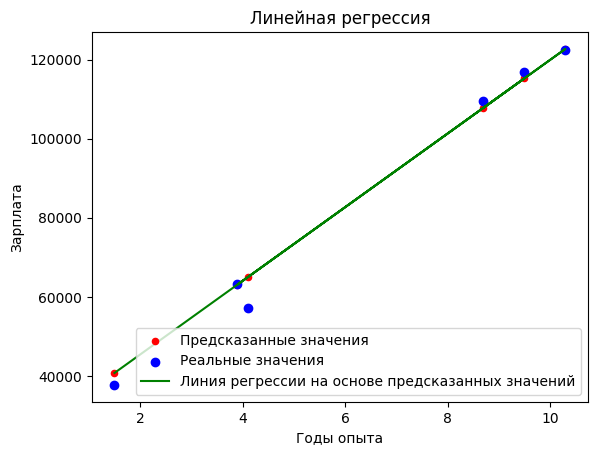

26780.09915062818 [9312.57512673]


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

url = "https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv"
data = pd.read_csv(url)
X = data.iloc[:, 0].values.reshape(-1, 1)
y = data.iloc[:, 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predict = regressor.predict(X_test)
plt.scatter(X_test, predict, color='red', label="Предсказанные значения", s=20)
plt.scatter(X_test, y_test, color='blue', label="Реальные значения")
plt.plot(X_test, predict, color='green', label="Линия регрессии на основе предсказанных значений")
plt.xlabel('Годы опыта')
plt.ylabel('Зарплата')
plt.title('Линейная регрессия')
plt.legend()
plt.show()
print(regressor.intercept_, regressor.coef_) # свободный коэф, коэф при х

Постройте модель множественной линейной регрессии для произвольных данных из нескольких столбцов. Для примера можно взять потребления газа (в миллионах галлонов) в 48 штатах США или набор данных о качестве красного вина (1) и (2) соответственно. Найдите коэффициенты множественной регрессии. Постройте прогноз.  
- [ ] https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv
- [x] https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

url = "https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv"
df = pd.read_csv(url)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predict = regressor.predict(X_test)
# ошибка
print("Mean Squared Error:", metrics.mean_squared_error(y_test, predict))

# сравнение предикций и настоящих значений
df_new = pd.DataFrame({'Actual': y_test, 'Predicted': predict})
df_new

# коэффициенты
#print(pd.DataFrame(regressor.coef_, X.columns, columns=["Coefficient"]))

# график сравнения
#plt.scatter(y_test, predict, color='green')
#plt.show()

Mean Squared Error: 0.3844711978201246


,Actual,Predicted
1109,6,5.782930
1032,5,5.036193
1002,7,6.596989
487,6,5.339126
979,5,5.939529
...,...,...
794,6,6.559757
813,4,6.017576
1322,5,6.251291
704,4,5.163926


Задача: Экспериментально получены N − значений величины Y при различных значениях величины X. Определить коэффициенты полиномов первой и второй степени, аппроксимирующих результаты эксперимента, с применением метода наименьших квадратов. Вычислить СКО. Расчеты проводятся вручную с указанием формул, применяемых для определения коэффициентов и подробных расчетов (сдаются на листке преподавателю, письменный опрос). В тетрадке Jupyter Notebook решение реализуется методами на усмотрение студента.
Вариант выбирается по последней цифре номера студенческого билета. 
Если номер заканчивается на 1, то вариант 1, на ноль – вариант 10.


C:\Users\shkol\AppData\Local\Temp\ipykernel_20052\81312693.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, m_first*x + c, 'r', label='Полином первого порядка', color="green")


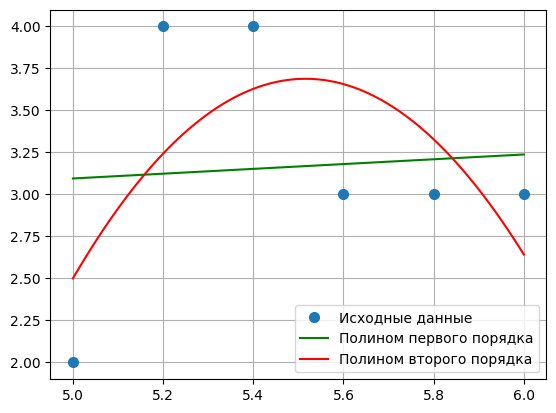

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([5.0, 5.2, 5.4, 5.6, 5.8, 6.0])
y = np.array([2.0, 4.0, 4.0, 3.0, 3.0, 3.0])

A = np.vstack([x, np.ones(len(x))]).T
m_first, c = np.linalg.lstsq(A, y, rcond=None)[0]

m = np.vstack([x**2, x, np.ones(len(x))]).T
s = np.linalg.lstsq(m, y, rcond=None)[0]
x_prec = np.linspace(x.min(), x.max(), 100)

plt.plot(x, y, 'o', label='Исходные данные', markersize=7)
plt.plot(x, m_first*x + c, 'r', label='Полином первого порядка', color="green")
plt.plot(x_prec, s[0]*x_prec**2 + s[1]*x_prec + s[2], label="Полином второго порядка", color="red")
plt.grid()
plt.legend()
plt.show()